## DATA PREPROCESSING

Data preprocessing is the process of transforming raw data into a clean and structured format that can be effectively used for analysis or machine learning tasks. It is a critical step in any data science or medical imaging pipeline, especially in high-stakes domains like healthcare and radiology, where data quality directly affects model reliability.

In [1]:
##############################################################
#  Importing the required libraries for data preprocessing
##############################################################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from IPython.display import Image
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
from sklearn.preprocessing import OrdinalEncoder
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
import networkx as nx
from sklearn.preprocessing import StandardScaler


In [ ]:
##############################################################
#  Setting the base path for the dataset
##############################################################

data_path = Path("../dataset")
image_path = Path("../images")
files_path = Path("../files")


In [ ]:
##############################################################
#  Loading the original excel file into pandas dataframe 
#  Viewing how the data looks
##############################################################

orig_data_path = files_path / "original dataset.xlsx"
original_data = pd.read_excel(orig_data_path)
original_data

,Absolute File Name,Image No,Amplification,Classification,Contrast to Noise Ratio (CNR),Signal to Noise Ratio (SNR)
0,C:\Users\danie\OneDrive - University of Exeter...,103,140Kvp-430mAs,Iodine,0.000000,0.000000
1,C:\Users\danie\OneDrive - University of Exeter...,104,140Kvp-430mAs,Iodine,0.000000,0.000000
2,C:\Users\danie\OneDrive - University of Exeter...,105,140Kvp-430mAs,Iodine,4.491631,5.823851
3,C:\Users\danie\OneDrive - University of Exeter...,106,140Kvp-430mAs,Iodine,5.983274,4.667814
4,C:\Users\danie\OneDrive - University of Exeter...,107,140Kvp-430mAs,Iodine,0.000000,0.000000
...,...,...,...,...,...,...
3090,C:\Users\danie\OneDrive - University of Exeter...,98,140Kvp-430mAs,Iodine,0.000000,0.000000
3091,C:\Users\danie\OneDrive - University of Exeter...,99,140Kvp-430mAs,Iodine,4.577751,-2.209947
3092,C:\Users\danie\OneDrive - University of Exeter...,100,140Kvp-430mAs,Iodine,6.765876,-3.993894
3093,C:\Users\danie\OneDrive - University of Exeter...,101,140Kvp-430mAs,Iodine,0.000000,0.000000


At this point , we could see that the dataset contains the file location with the amplification details available in the same column. Hence , we are going to perform VLOOKUP operation in the excel file and then separate the image filename, Voltage and Current per second(Time) from the original dataset so that it is in the format for ML model consumption 

In [ ]:
##############################################################
#  Loading the processed dataset from the csv file 
#  Viewing how the data looks
# It contains Filename, Voltage, Time column(current)
##############################################################

processed_data_path = files_path / "processed_dataset.csv"
processed_data = pd.read_csv(processed_data_path)
processed_data

,Absolute File Name,Filename,Image No,Amplification,Classification,Voltage,Time,CNR,SNR
0,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_103.tif,103,140Kvp-430mAs,Iodine,140,430,0.000000,0.000000
1,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_104.tif,104,140Kvp-430mAs,Iodine,140,430,0.000000,0.000000
2,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_105.tif,105,140Kvp-430mAs,Iodine,140,430,4.491631,5.823851
3,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_106.tif,106,140Kvp-430mAs,Iodine,140,430,5.983274,4.667814
4,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_107.tif,107,140Kvp-430mAs,Iodine,140,430,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
3087,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_98.tif,98,140Kvp-430mAs,Iodine,140,430,0.000000,0.000000
3088,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_99.tif,99,140Kvp-430mAs,Iodine,140,430,4.577751,-2.209947
3089,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_100.tif,100,140Kvp-430mAs,Iodine,140,430,6.765876,-3.993894
3090,C:\Users\danie\OneDrive - University of Exeter...,Iodine_140Kvp-430mAs_101.tif,101,140Kvp-430mAs,Iodine,140,430,0.000000,0.000000


In [5]:
#############################################################################
#   Now we are dropping the unnecessary columns from the dataframe
#############################################################################

processed_data.drop(columns=['Absolute File Name', 'Image No','Amplification'], inplace=True)
processed_data

,Filename,Classification,Voltage,Time,CNR,SNR
0,Iodine_140Kvp-430mAs_103.tif,Iodine,140,430,0.000000,0.000000
1,Iodine_140Kvp-430mAs_104.tif,Iodine,140,430,0.000000,0.000000
2,Iodine_140Kvp-430mAs_105.tif,Iodine,140,430,4.491631,5.823851
3,Iodine_140Kvp-430mAs_106.tif,Iodine,140,430,5.983274,4.667814
4,Iodine_140Kvp-430mAs_107.tif,Iodine,140,430,0.000000,0.000000
...,...,...,...,...,...,...
3087,Iodine_140Kvp-430mAs_98.tif,Iodine,140,430,0.000000,0.000000
3088,Iodine_140Kvp-430mAs_99.tif,Iodine,140,430,4.577751,-2.209947
3089,Iodine_140Kvp-430mAs_100.tif,Iodine,140,430,6.765876,-3.993894
3090,Iodine_140Kvp-430mAs_101.tif,Iodine,140,430,0.000000,0.000000


### Now, Lets perform Exploratory Data Analysis and see how the data is distributed especially in the SNR column

In [6]:
#############################################################################
#   Setting the plot sizes as per the standards
#############################################################################
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

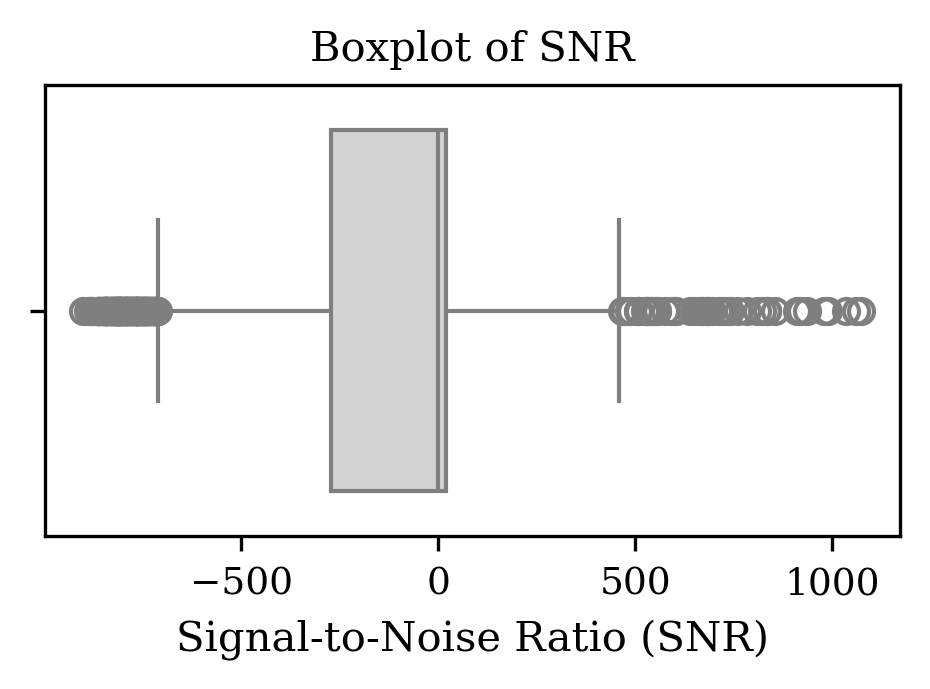

In [7]:
#############################################################################
#   Lets see how the SNR is distributed in the data
#############################################################################

plt.figure(figsize=(3.2, 2.4)) 
sns.boxplot(
    x=processed_data['SNR'],
    color='lightgray',
    linewidth=1
)

plt.xlabel("Signal-to-Noise Ratio (SNR)")
plt.title("Boxplot of SNR", fontsize=10)
plt.tight_layout()
plt.show()

### Interpretation of the SNR Box Plot

- The **box** shows where most of the SNR values lie (middle 50%).
- The **line in the middle** of the box is the **median SNR** — half the values are above it and half below.
- The **SNR values vary a lot**, showing that image quality is not consistent across all scans.
- There are many **very high SNR values** (dots on the right) — these are called **outliers**.
- There are also **negative SNR values** (dots on the left)
- These **extreme values (outliers)** can affect machine learning results if not handled properly.

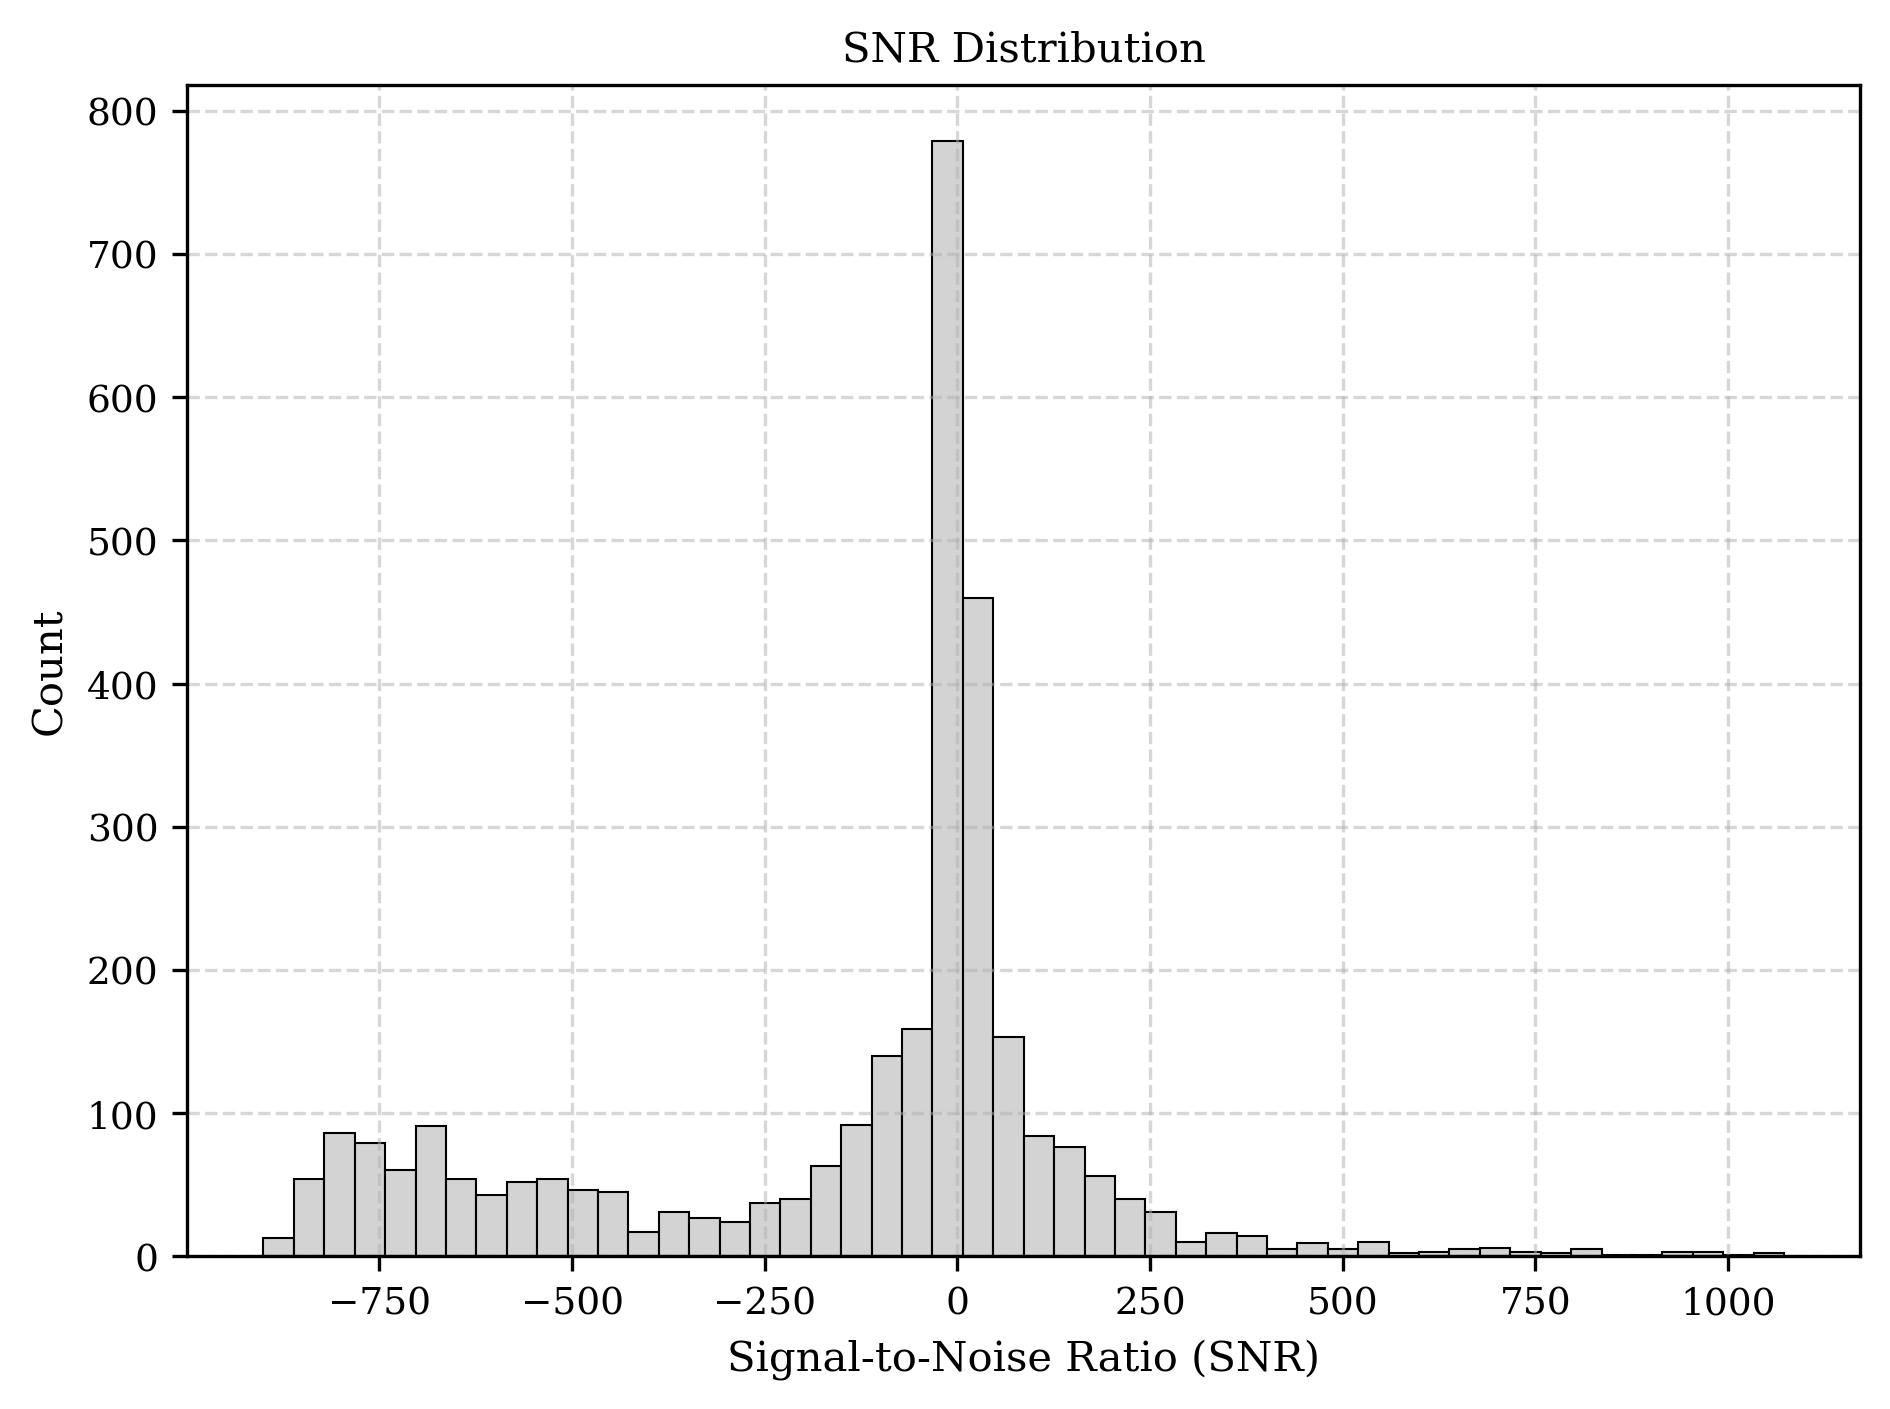

In [8]:
# Histogram plot
snr_values = processed_data['SNR']
plt.hist(snr_values, bins=50, color='lightgray', edgecolor='black', linewidth=0.5)
plt.title("SNR Distribution")
plt.xlabel("Signal-to-Noise Ratio (SNR)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###  Histogram of Signal-to-Noise Ratio (SNR)

- The histogram shows the distribution of SNR values across all CT scans.
- Most values are tightly concentrated around **0**, suggesting a large number of low-quality or normalized SNR measurements.
- There are many **extremely high** and **extremely low** SNR values, forming **long tails** on both ends.
- A significant number of **negative SNR values** are present


Now, lets view the distribution of other columns in the dataset like "Classification" , "Voltage" , "Time"

In [9]:
##############################################################
#  Classification or Contrast Agent column Unique values
#  It is categorical column 
##############################################################

processed_data['Classification'].value_counts()

Classification
BiNPs 100nm    1040
BiNPs 50nm     1038
Iodine         1014
Name: count, dtype: int64

In [10]:
##############################################################
#  Voltage column Unique values
#  It is categorical column 
##############################################################

processed_data['Voltage'].value_counts()

Voltage
120    780
80     779
140    777
100    756
Name: count, dtype: int64

In [11]:
##############################################################
#  Current per given time Unique values
#  It is categorical column 
##############################################################

processed_data['Time'].value_counts()

Time
215    1558
430    1534
Name: count, dtype: int64

### Since the distribution of SNR is highly skewed, we are going to filter the dataset alongside Q1 and Q3 quartiles 

In [12]:
##############################################################
#  Filter the dataset based on the SNR values
##############################################################

Q1 = processed_data['SNR'].quantile(0.25)
Q3 = processed_data['SNR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Q1 SNR value is {lower_bound}")
print(f" Q3 SNR value is {upper_bound}")

# Remove outliers
filtered_df = processed_data[(processed_data['SNR'] >= lower_bound) & (processed_data['SNR'] <= upper_bound)]


 Q1 SNR value is -712.34517283125
 Q3 SNR value is 460.51868411874995


In [13]:
##############################################################
#  Now save the filtered data as new csv file "dataset.csv"
##############################################################

new_dataset_path = data_path / "final_dataset.csv"
filtered_df.to_csv(new_dataset_path, index=False)

In [14]:
##############################################################
#  Filtered dataframe has 2759 rows
##############################################################

filtered_df

,Filename,Classification,Voltage,Time,CNR,SNR
0,Iodine_140Kvp-430mAs_103.tif,Iodine,140,430,0.000000,0.000000
1,Iodine_140Kvp-430mAs_104.tif,Iodine,140,430,0.000000,0.000000
2,Iodine_140Kvp-430mAs_105.tif,Iodine,140,430,4.491631,5.823851
3,Iodine_140Kvp-430mAs_106.tif,Iodine,140,430,5.983274,4.667814
4,Iodine_140Kvp-430mAs_107.tif,Iodine,140,430,0.000000,0.000000
...,...,...,...,...,...,...
3087,Iodine_140Kvp-430mAs_98.tif,Iodine,140,430,0.000000,0.000000
3088,Iodine_140Kvp-430mAs_99.tif,Iodine,140,430,4.577751,-2.209947
3089,Iodine_140Kvp-430mAs_100.tif,Iodine,140,430,6.765876,-3.993894
3090,Iodine_140Kvp-430mAs_101.tif,Iodine,140,430,0.000000,0.000000


In [15]:
##############################################################
#  Final Dataset to be used for modelling and its structure
##############################################################

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2759 entries, 0 to 3091
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Filename        2759 non-null   object 
 1   Classification  2759 non-null   object 
 2   Voltage         2759 non-null   int64  
 3   Time            2759 non-null   int64  
 4   CNR             2759 non-null   float64
 5   SNR             2759 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 150.9+ KB


After preprocessing and finalizing the dataset along with the causal assumptions made, below is the manual causal DAG which we will be validating further! 

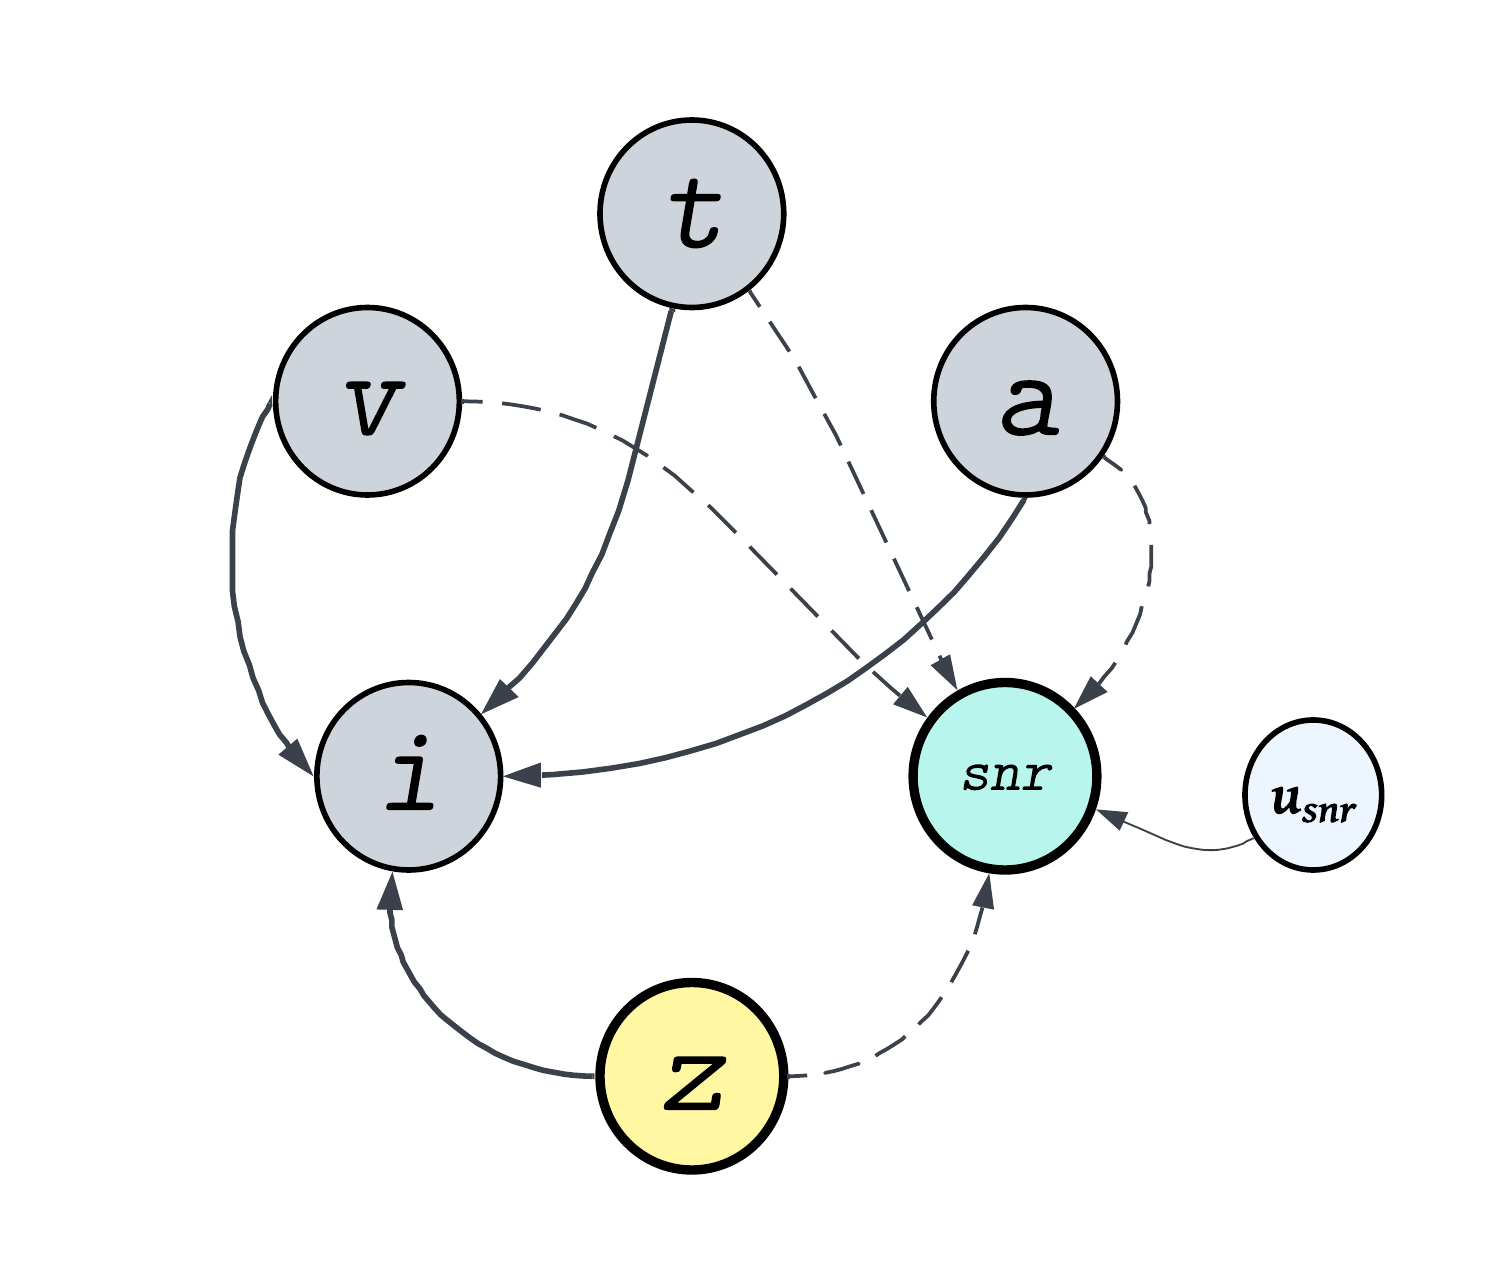

In [16]:
##############################################################
#  Loading the manually constructed causal graph
##############################################################

dag_path = image_path / "capri-ct-dag.png"
Image(dag_path)

Now , we are going to validate the causal graph using PC algorithm

### PC Algorithm 

The **PC algorithm** (named after its creators Peter Spirtes and Clark Glymour) is a widely used constraint-based method for learning the causal structure of a directed acyclic graph (DAG) from observational data. It operates by performing a series of conditional independence tests to infer the presence or absence of edges between variables, thereby uncovering the underlying causal relationships.

In [17]:
##############################################################
#  Prepare the dataset for causal dag validation
##############################################################

data_proc = filtered_df.drop(columns=[ 'Filename','CNR'])

# Separate numeric and categorical
num_cols = data_proc.select_dtypes(include=['number']).columns.tolist()
cat_cols = data_proc.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode categoricals, drop first to avoid singularity
oe = OrdinalEncoder()

# Apply ordinal encoding to categorical columns
data_proc[cat_cols] = oe.fit_transform(data_proc[cat_cols])

# Now all data_proc columns are numeric
combined_df = data_proc[num_cols + cat_cols]
filtered_np = combined_df.to_numpy(dtype=np.float64)

# Check for NaN/Inf
assert not np.isnan(filtered_np).any(), "NaNs found"
assert not np.isinf(filtered_np).any(), "Infs found"

# Run PC
cg = pc(filtered_np, indep_test_func=fisherz, alpha=0.05)

# Map node names
cg.node_names = combined_df.columns.tolist()

print("Nodes:", cg.node_names)


  0%|          | 0/4 [00:00<?, ?it/s]

Nodes: ['Voltage', 'Time', 'SNR', 'Classification']


In [18]:
##############################################################
#  Create a network graph to see how the causal input 
#  variables are linked together
##############################################################

def generalgraph_to_networkx(g, node_names=None):
    G = nx.DiGraph()
    n = len(g.nodes)
    if node_names is None:
        node_names = [str(i) for i in range(n)]
    # Add nodes with labels
    for i, node in enumerate(g.nodes):
        G.add_node(i, label=node_names[i])
    # Add edges
    for i, node in enumerate(g.nodes):
        children = g.get_children(node)
        for child in children:
            j = g.nodes.index(child)  # find child's index
            G.add_edge(i, j)
    return G

node_names = cg.node_names if hasattr(cg, 'node_names') else None
nx_graph = generalgraph_to_networkx(cg.G, node_names=node_names)


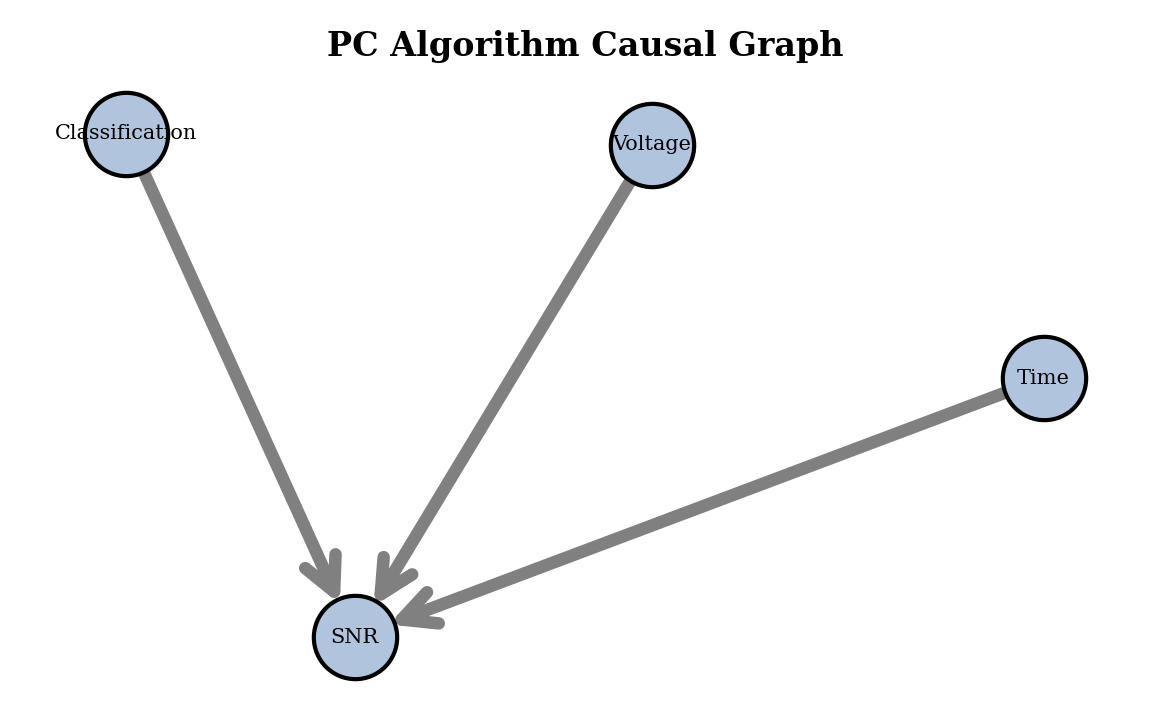

In [19]:
##############################################################
#  Plot the network graph
##############################################################

plt.figure(figsize=(4, 2.5))  
pos = nx.spring_layout(nx_graph, seed=42)

labels = {i: label for i, label in enumerate(node_names)} if node_names else None

# Draw nodes
nx.draw_networkx_nodes(nx_graph, pos, node_color='lightsteelblue', node_size=400, linewidths=1, edgecolors='black')

# Draw labels 
nx.draw_networkx_labels(nx_graph, pos, labels=labels, font_size=5, font_family='serif')

# Draw directed edges
nx.draw_networkx_edges(nx_graph, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=3)

plt.title("PC Algorithm Causal Graph", fontsize=8, fontweight='bold', fontfamily='serif')
plt.axis('off')

plt.tight_layout()
plt.show()


The results  revealed that SNR is directly influenced by voltage, time, and, interestingly, contrast agent which is classification, suggesting potential causal influence from contrast usage that warrants further investigation. As the PC algorithm operates solely on structured numerical variables, image data was excluded from this discovery step.

Next step , lets find out how the columns are correlated with each other!

In [20]:
##############################################################
#  Lets find the correlation between columns
##############################################################

corr_df = filtered_df[['Classification','Voltage','Time','SNR']]
corr_df_encoded = pd.get_dummies(corr_df, columns=['Classification'])
continuous_cols = ['Voltage', 'Time', 'SNR']
scaler = StandardScaler()
corr_df_encoded[continuous_cols] = scaler.fit_transform(corr_df_encoded[continuous_cols])
corr_matrix = corr_df_encoded.corr()
print("Correlation Matrix:\n", corr_matrix)


Correlation Matrix:
                              Voltage      Time       SNR  \
Voltage                     1.000000  0.037778 -0.050103   
Time                        0.037778  1.000000 -0.132000   
SNR                        -0.050103 -0.132000  1.000000   
Classification_BiNPs 100nm -0.057365  0.004160  0.396578   
Classification_BiNPs 50nm   0.068933  0.012923 -0.764029   
Classification_Iodine      -0.006867 -0.016108  0.313856   

                            Classification_BiNPs 100nm  \
Voltage                                      -0.057365   
Time                                          0.004160   
SNR                                           0.396578   
Classification_BiNPs 100nm                    1.000000   
Classification_BiNPs 50nm                    -0.459454   
Classification_Iodine                        -0.568019   

                            Classification_BiNPs 50nm  Classification_Iodine  
Voltage                                      0.068933              -0.00

### Correlation Matrix Interpretation

This correlation matrix displays the pairwise Pearson correlation coefficients between the variables: `Voltage`, `Time`, `SNR`, and the contrast agent classifications (`Classification_BiNPs 100nm`, `Classification_BiNPs 50nm`, and `Classification_Iodine`). Each coefficient ranges from **-1** (strong negative linear correlation) to **+1** (strong positive linear correlation), with **0** indicating no linear relationship.

---

#### 🔧 Acquisition Parameters

| Variable Pair     | Correlation | Interpretation |
|-------------------|-------------|----------------|
| Voltage & Time    | +0.038      | No meaningful correlation — largely independent variables. |
| Voltage & SNR     | -0.050      | Negligible negative correlation — voltage has minimal effect on SNR. |
| Time & SNR        | -0.132      | Weak negative correlation — longer scan time slightly decreases SNR. |

---

#### 🧪 Contrast Agents vs SNR

| Variable Pair                  | Correlation | Interpretation |
|--------------------------------|-------------|----------------|
| BiNPs 100nm & SNR              | +0.397      | Moderate positive correlation — associated with increased SNR. |
| BiNPs 50nm & SNR               | **-0.764**  | **Strong negative correlation** — significantly reduces SNR. |
| Iodine & SNR                   | +0.314      | Moderate positive correlation — associated with higher SNR. |

> **Key Insight:** Among all variables, `Classification_BiNPs 50nm` has the strongest correlation with `SNR`, indicating that its presence notably reduces signal quality.

---

#### 🧪 Agent Interrelationships

| Variable Pair                            | Correlation | Interpretation |
|------------------------------------------|-------------|----------------|
| BiNPs 100nm & BiNPs 50nm                 | -0.459      | Moderate negative — rarely used together. |
| BiNPs 100nm & Iodine                     | -0.568      | Strong negative — mutually exclusive usage pattern. |
| BiNPs 50nm & Iodine                      | -0.470      | Moderate negative — also rarely co-administered. |

> This suggests a controlled or exclusive contrast agent assignment protocol across scans.

---

### ✅ Summary

- Acquisition parameters (`Voltage`, `Time`) show minimal linear relationship with each other or with `SNR`.
- Contrast agent type has a **stronger influence** on `SNR`, especially `BiNPs 50nm`, which is **strongly negatively correlated** with signal quality.
- The negative inter-correlations between contrast agents suggest **mutually exclusive administration** in the dataset.
